# Narration

Using dispersion plots 

In [1]:
import dhlab.nbtext as nb
import dhlab.module_update as mu

In [42]:
mu.update('wordbank')

Updated file `C:\Users\larsj\Documents\GitHub\narrative-buer\wordbank.py`

In [51]:
import requests

# Norwegian word bank
def word_variant(word, form):
    """ Find alternative form for a given word form, e.g. word_variant('spiste', 'pres-part') """
    r = requests.get("https://api.nb.no/ngram/variant_form", params={'word':word, 'form':form})
    return r.json()

def word_paradigm(word):
    """ Find paradigm form for a word  """
    r = requests.get("https://api.nb.no/ngram/paradigm", params = {'word': word})
    return r.json()

def word_paradigm_many(wordlist):
    """ Find alternative form for a list words """
    r = requests.post("https://api.nb.no/ngram/paradigms", json = {'words': wordlist})
    return r.json()


def word_form(word):
    """ Find alternative form for a given word form, e.g. word_variant('spiste', 'pres-part') """
    r = requests.get("https://api.nb.no/ngram/word_form", params = {'word': word})
    return r.json()

def word_form_many(wordlist):
    """ Find alternative forms for a list of words """
    r = requests.post("https://api.nb.no/ngram/word_forms", json = {'words': wordlist})
    return r.json()

def word_lemma(word):
    """ Find lemma form for a given word form """
    r = requests.get("https://api.nb.no/ngram/word_lemma", params = {'word': word})
    return r.json()

def word_lemma_many(wordlist):
    """ Find lemma form for a given word form """
    r = requests.post("https://api.nb.no/ngram/word_lemmas", json = {'words': wordlist})
    return r.json()

In [43]:
import wordbank as wb

In [49]:
wb.word_lemma('sover')

[['verb', 'sove']]

In [53]:
word_lemma_many(['sover', 'spiser'])

[['sover', 'verb', 'sove'],
 ['spiser', 'subs', 'spis'],
 ['spiser', 'verb', 'spise'],
 ['spiser', 'subs', 'spise']]

In [2]:
mu.css()

In [37]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Egennavn \n"
    navn += ', '.join(categories['propr'])
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += ', '.join(Grouping[cat]) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return

In [39]:
import requests

In [20]:
ref = nb.frame(nb.totals(50000), 'tot')

In [32]:
corpus = nb.frame(nb.book_urn(author='uri%helene%', limit = 100, lang='nob'), "id author title year".split())

In [34]:
corpus_agg = nb.get_aggregated_corpus(corpus['id'])

In [35]:
pmi = nb.frame_sort(nb.frame(corpus_agg[0]/ref.tot))

In [36]:
pmi.head(50)

,0
Nanna,0.036895
Frøydis,0.029615
Jenna,0.023387
Viola,0.017352
Pål,0.013485
Edith,0.010961
Karsten,0.010040
Henriette,0.008753
Sara,0.008720
Ella,0.007796


In [72]:
txt = nb.get_corpus_text([str(x) for x in corpus.id])

In [75]:
txt.head(10)

,2014072808125,2011051608118,2011102805104,2009060900033,2009010804014,2008022200098,2013021207062,2012022305000,2009061900015,2011061408092,...,2014061706080,2010043003062,2012121408044,2009042004109,2011071208188,2012062505081,2011101408121,2015042348089,2016021507517,2014070105102
",",8426.0,4111.0,6176.0,1654.0,4194.0,2292.0,280.0,2655.0,4202.0,8439.0,...,8687.0,2758.0,2931.0,2916.0,2381.0,1817.0,8371.0,1359.0,95.0,4230.0
.,5558.0,5663.0,5964.0,1958.0,5567.0,2420.0,592.0,2237.0,5584.0,5413.0,...,8443.0,2440.0,5660.0,5629.0,2475.0,1660.0,5547.0,1380.0,117.0,5697.0
og,3474.0,1819.0,2549.0,937.0,2261.0,1271.0,257.0,1501.0,2260.0,3477.0,...,3408.0,1673.0,1416.0,1411.0,1316.0,748.0,3443.0,702.0,54.0,1860.0
i,2444.0,1209.0,1776.0,490.0,1278.0,478.0,149.0,1046.0,1279.0,2450.0,...,2400.0,996.0,1035.0,1033.0,511.0,607.0,2444.0,605.0,67.0,1234.0
det,2189.0,1468.0,2034.0,588.0,1181.0,940.0,110.0,916.0,1181.0,2187.0,...,2607.0,1277.0,1143.0,1145.0,930.0,619.0,2181.0,663.0,36.0,1499.0
han,2126.0,266.0,1760.0,186.0,157.0,121.0,47.0,59.0,157.0,2129.0,...,1140.0,99.0,244.0,244.0,126.0,32.0,2121.0,68.0,1.0,274.0
er,2078.0,1130.0,899.0,466.0,1311.0,704.0,200.0,1328.0,1310.0,2071.0,...,1056.0,1327.0,1006.0,1005.0,727.0,732.0,2072.0,812.0,42.0,1147.0
på,2001.0,1097.0,1711.0,405.0,1065.0,671.0,126.0,605.0,1065.0,1984.0,...,2240.0,880.0,1027.0,1025.0,690.0,418.0,1971.0,442.0,38.0,1128.0
en,1729.0,813.0,1282.0,318.0,798.0,393.0,102.0,584.0,798.0,1729.0,...,1982.0,475.0,684.0,685.0,414.0,492.0,1723.0,312.0,48.0,821.0
som,1710.0,701.0,1257.0,281.0,770.0,523.0,61.0,834.0,771.0,1711.0,...,1602.0,931.0,509.0,507.0,539.0,741.0,1700.0,453.0,49.0,708.0


In [78]:
txt.loc[', . og han hun det er på'.split()].style.background_gradient()

,2014072808125,2011051608118,2011102805104,2009060900033,2009010804014,2008022200098,2013021207062,2012022305000,2009061900015,2011061408092,2014021748060,2008120100033,2014070305039,2014081508142,2011041408107,2012112808039,2014061706080,2010043003062,2012121408044,2009042004109,2011071208188,2012062505081,2011101408121,2015042348089,2016021507517,2014070105102
",",8426.000000,4111.000000,6176.000000,1654.000000,4194.000000,2292.000000,280.000000,2655.000000,4202.000000,8439.000000,2952.000000,2908.000000,4219.000000,1515.000000,4215.000000,6183.000000,8687.000000,2758.000000,2931.000000,2916.000000,2381.000000,1817.000000,8371.000000,1359.000000,95.000000,4230.000000
.,5558.000000,5663.000000,5964.000000,1958.000000,5567.000000,2420.000000,592.000000,2237.000000,5584.000000,5413.000000,2397.000000,5654.000000,5546.000000,1400.000000,5686.000000,5982.000000,8443.000000,2440.000000,5660.000000,5629.000000,2475.000000,1660.000000,5547.000000,1380.000000,117.000000,5697.000000
og,3474.000000,1819.000000,2549.000000,937.000000,2261.000000,1271.000000,257.000000,1501.000000,2260.000000,3477.000000,1554.000000,1411.000000,2266.000000,774.000000,1857.000000,2553.000000,3408.000000,1673.000000,1416.000000,1411.000000,1316.000000,748.000000,3443.000000,702.000000,54.000000,1860.000000
han,2126.000000,266.000000,1760.000000,186.000000,157.000000,121.000000,47.000000,59.000000,157.000000,2129.000000,85.000000,244.000000,157.000000,91.000000,274.000000,1759.000000,1140.000000,99.000000,244.000000,244.000000,126.000000,32.000000,2121.000000,68.000000,1.000000,274.000000
hun,1260.000000,564.000000,1464.000000,271.000000,1068.000000,249.000000,63.000000,95.000000,1068.000000,1261.000000,65.000000,131.000000,1070.000000,19.000000,581.000000,1466.000000,2784.000000,65.000000,132.000000,131.000000,249.000000,16.000000,1256.000000,31.000000,nan,582.000000
det,2189.000000,1468.000000,2034.000000,588.000000,1181.000000,940.000000,110.000000,916.000000,1181.000000,2187.000000,1229.000000,1145.000000,1181.000000,659.000000,1498.000000,2033.000000,2607.000000,1277.000000,1143.000000,1145.000000,930.000000,619.000000,2181.000000,663.000000,36.000000,1499.000000
er,2078.000000,1130.000000,899.000000,466.000000,1311.000000,704.000000,200.000000,1328.000000,1310.000000,2071.000000,1269.000000,1006.000000,1311.000000,745.000000,1151.000000,899.000000,1056.000000,1327.000000,1006.000000,1005.000000,727.000000,732.000000,2072.000000,812.000000,42.000000,1147.000000
på,2001.000000,1097.000000,1711.000000,405.000000,1065.000000,671.000000,126.000000,605.000000,1065.000000,1984.000000,795.000000,1024.000000,1068.000000,418.000000,1125.000000,1713.000000,2240.000000,880.000000,1027.000000,1025.000000,690.000000,418.000000,1971.000000,442.000000,38.000000,1128.000000


In [81]:
a = nb.get_freq(2014072808125, top=0, cutoff=2)

In [84]:
adf = nb.frame(a)

In [120]:
names = categorize(adf.index)['propr']

In [107]:
adf.loc['utstyrt']

0    4
Name: utstyrt, dtype: int64

In [116]:
nb.urn_concordance(urns = 2014072808125, word = 'sjalusi', before = 12, after = 12, size=20)

"De beste blant oss, Uri, Helene, 2010","idealer . Den dreier seg om begjær , om kjærlighet , om",sjalusi,og misunnelse . Om bedrageriets besettelse og dumhetens arroganse .
"De beste blant oss, Uri, Helene, 2010",historien om Pål Bentzen og Edith Rinkel : dårlig fordøyelse og utøylelig,sjalusi,.
"De beste blant oss, Uri, Helene, 2010",kjente ( for det faller Pål naturlig å tolke Rinkels blikk som,sjalusi,") , blir erstattet av irritasjon , sterk irritasjon, over at den"
"De beste blant oss, Uri, Helene, 2010","De snakker videre om utnyttelse og hensynsløshet , om veiledere som i",sjalusi,og sinne har forsøkt å holde nede altfor dyktige stipendiater . De
"De beste blant oss, Uri, Helene, 2010","misunnelse kan starte kriger og få riker til å gå under ,",sjalusi,kan gjøre at de tåpeligste beslutninger tas . På den annen side
"De beste blant oss, Uri, Helene, 2010",de tåpeligste beslutninger tas . På den annen side kan misunnelse og,sjalusi,føre til sublime kunstverk og høyverdig vitenskap . Så å si alle
"De beste blant oss, Uri, Helene, 2010","til annen , så å si alle har opplevd gul og giftig",sjalusi,. Men hos noen veldig få finnes det ingen spor av verken
"De beste blant oss, Uri, Helene, 2010",hos noen veldig få finnes det ingen spor av verken misunnelse eller,sjalusi,. Edith Rinkel tilhører dette lille mindretallet .
"De beste blant oss, Uri, Helene, 2010","sjarmerende blanding , og resultatet kan nok lett forveksles med misunnelse eller",sjalusi,. )
"De beste blant oss, Uri, Helene, 2010",er hun en kvinne som i sterk grad fremkaller andres misunnelse og,sjalusi,", akkurat slik hennes venninne Rita Enoksen-Lie påpekte . Hennes faglige suverenitet"
"De beste blant oss, Uri, Helene, 2010","mor , fordi han tolker morens reaksjon som et utslag av hennes",sjalusi,"og havesyke . Deretter ler han oppgitt av seg seiv , han"


In [90]:
beste_pmi = nb.frame_sort(nb.frame(adf[0]/ref.tot))

In [92]:
beste_pmi.head(50)

,0
Nanna,0.012399
Pål,0.004457
Edith,0.003657
Mills,0.001120
kantinen,0.001094
Lone,0.001063
Aleksander,0.000966
Paulsen,0.000856
instituttets,0.000856
Holstein,0.000766


In [100]:
g = nb.make_network_graph(2014072808125, list(beste_pmi.head(200).index))

In [121]:
gpropr = nb.make_network_graph(2014072808125, names)

In [96]:
import dhlab.graph_networkx_louvain as gnl

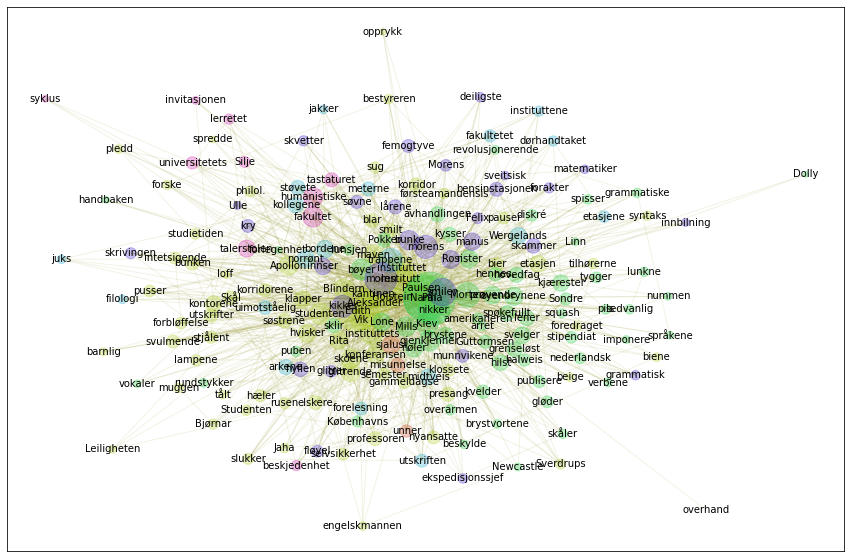

In [101]:
gnl.show_graph(g)

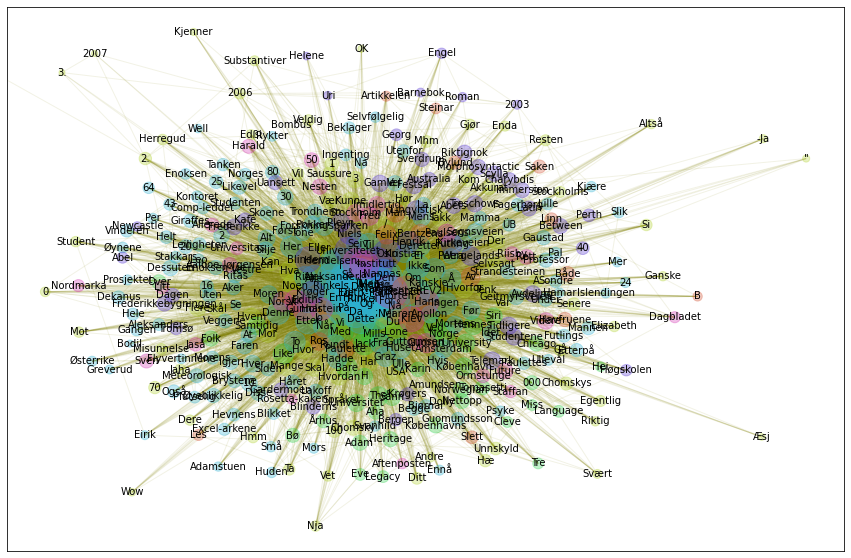

In [123]:
gnl.show_graph(gpropr)

In [102]:
gnl.show_communities(g)

Edith-Institutt :  Edith, Institutt, Aleksander, instituttet, Vik, studenten, Holstein, skoene, maven, Apollon, Blindern, glitrende, hvisker, sjalusi, Rita, klapper, etasjen, kontorene, korridor, hyllen, misunnelse, søstrene, elskere, presang, professoren, gammeldagse, blar, Skål, smilt, semester, nyansatte, korridorene, bier, svulmende, stjålent, unner, hæler, klossete, pusser, selvsikkerhet, fløyel, forbløffelse, intetsigende, sug, slukker, lampene, rusen, philol., studietiden, Sverdrups, Studenten, beskjedenhet, Bjørnar, førsteamanuensis, bestyreren, Jaha, syntaks, muggen, forske, pledd, biene, engelskmannen, tålt, barnlig, Leiligheten, loff, spredde

Pål-Nanna :  Pål, Nanna, nikker, Paulsen, kantinen, Morten, Kiev, gjenkjenner, Mills, øyenbrynene, rister, konferansen, Lone, nøler, prøvende, svelger, kjærester, brystene, hilst, avhandlingen, grenseløst, spøkefullt, hovedfag, lener, sklir, Pokker, kvelder, hennes,, Guttormsen, halweis, publisere, Sondre, pauser, stipendiat, diskré, g

In [124]:
gnl.show_communities(gpropr)

--? :  -, ?, !, Jeg, Ja, Nei, ..., Du, Vi, Noen, Jo, Kanskje, Er, Hva, Eller, USA, Har, Hvem, Mange, Kan, Hvor, Mor, Hvordan, Tenk, Kunne, Skal, Flere, Skål, Takk, Chomsky, Vær, Selvsagt, Hør, Saussure, 1, Saken, Også, Senere, Chomskys, Kom, Unnskyld, Hæ, 2., Gå, Vil, Jaha, Ditt, Mhm, Si, Veldig, Ta, Egentlig, Resten, Les, 2006, Hmm, Gjør, Vet, Nja, Mot, Huden, Herregud, Dere, Substantiver, Edßi, Enda, Amundsen, Andre, 0, Dolly, Altså, Riktig, B, Svært, -Ja, Wow, Kjenner, OK, ", Æsj, 2007, 3.

'-Mills :  ', Mills, Norge, Jack, Bare, Like, The, University, Sånn, Folk, Heritage, Adam, Chicago, Nettopp, Over, Tomasetti, Bø, Aha, Eve, Language, Legacy, Cleve, Miss

(-) :  (, ), Rinkel, Edith, Institutt, Aleksander, Blindern, Ediths, Til, Ved, Rita, Hadde, Hvorfor, Hennes, Man, Pleyn, Universitet, Apollon, Telemark, Videre, Avdeling, Der, Frederikke, Var, Geitmyrsveien, Dessuten, Københavns, /, Rett, Aalboe-Jørgensen, Blinderns, 50, A, Sverdrups, Enoksen-Lie, Sven, Australia, Ritas, Mamma, 

In [54]:
words = categorize(pmi.index[:200])['other']

In [60]:
word_form_many(words)

[['språkene', 'subst nøyt appell fl be normert'],
 ['kantinen', 'subst mask appell ent be normert'],
 ['gammelnorsk', 'adj pos m/f ub ent normert'],
 ['gammelnorsk', 'adj pos nøyt ub ent normert'],
 ['gammelnorsk', 'subst mask appell ent ub normert'],
 ['gammelnorsk', 'subst nøyt appell ubøy normert'],
 ['latin', 'subst mask appell ent ub normert'],
 ['latin', 'subst nøyt appell ubøy normert'],
 ['dialekter', 'subst mask appell fl ub normert'],
 ['gjenkjenner', 'verb pres <trans1> normert'],
 ['venninner', 'subst fem appell fl ub normert'],
 ['venninner', 'subst mask appell fl ub normert'],
 ['vikingene', 'subst mask appell fl be normert'],
 ['kelneren', 'subst mask appell ent be klammeform'],
 ['kelneren', 'subst mask appell ent be normert'],
 ['kelneren', 'subst mask appell ent be unormert'],
 ['mammaen', 'subst mask appell ent be normert'],
 ['kasus', 'subst mask appell ent ub normert'],
 ['kasus', 'subst mask appell fl ub normert'],
 ['kasus', 'subst nøyt appell ent ub normert'],
 

In [64]:
corpus.loc[10].id

2014021748060

In [71]:
corpus.loc[12]

id        2014070305039
author      Uri, Helene
title     Honningtunger
year               2010
Name: 12, dtype: object

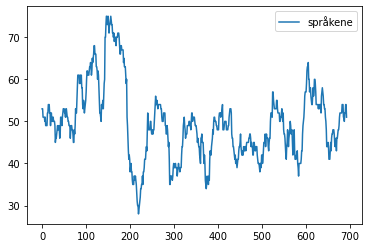

In [70]:
nb.plot_book_wordbags(str(corpus.loc[12].id),words).plot()

In [125]:
gnl.community_dict(g)

{'Edith-moren': ['Edith',
  'moren',
  'Aleksander',
  'kikker',
  'Vik',
  'studenten',
  'Holstein',
  'skoene',
  'maven',
  'Apollon',
  'glitrende',
  'hvisker',
  'Rita',
  'klapper',
  'kontorene',
  'hyllen',
  'søstrene',
  'elskere',
  'lårene',
  'presang',
  'professoren',
  'gammeldagse',
  'Skål',
  'smilt',
  'kry',
  'søvne',
  'femogtyve',
  'semester',
  'nyansatte',
  'korridorene',
  'svulmende',
  'stjålent',
  'hæler',
  'klossete',
  'glitrer',
  'pusser',
  'selvsikkerhet',
  'fløyel',
  'forbløffelse',
  'intetsigende',
  'sug',
  'slukker',
  'lampene',
  'rusen',
  'philol.',
  'studietiden',
  'Studenten',
  'beskjedenhet',
  'Bjørnar',
  'Jaha',
  'ekspedisjonssjef',
  'muggen',
  'engelskmannen',
  'tålt',
  'Leiligheten',
  'loff',
  'Ulle',
  'innbilning',
  'spredde'],
 'Institutt-Paulsen': ['Institutt',
  'Paulsen',
  'kantinen',
  'instituttet',
  'instituttets',
  'Blindern',
  'norrønt',
  'etasjen',
  'avhandlingen',
  'meterne',
  'pauser',
  'Sve

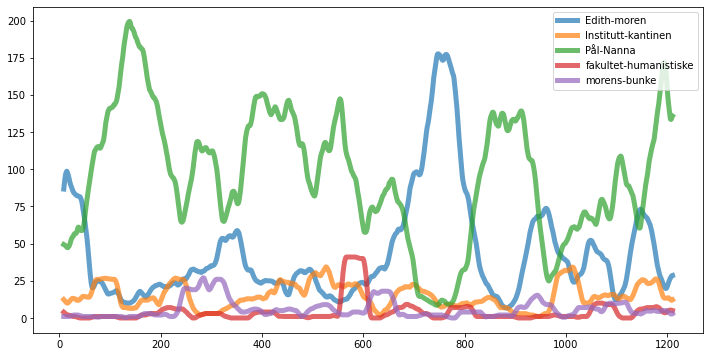

In [134]:
nb.plot_book_wordbags(2014072808125,gnl.community_dict(g)).rolling(window=10).mean().plot(figsize=(12,6), lw=5, alpha=0.7)